# Integrated Stock Forecasting Analysis

This notebook integrates and compares the ARIMA, LSTM, and MultiDQN models for stock forecasting. The analysis includes:
- Cross-model comparisons
- Trends across stocks
- Quantitative and visual disparity analysis between forecasted and actual values


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import load_model
from pmdarima import auto_arima
import joblib
from sklearn.preprocessing import MinMaxScaler

In [115]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce')
    df.set_index('datetime', inplace=True)
    df = df['close'].resample('D').mean()
    df.interpolate(method='linear', inplace=True)
    return df

In [116]:
# Included in case ARIMA predictions need to be updated
def get_predictions_arima(train, test):
    model_path = 'arima_model.pkl'
    if os.path.exists(model_path):
        model = joblib.load(model_path)
    else:
        model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
        joblib.dump(model, model_path)

    predictions = []
    for t in test.index:
        forecast = model.predict(n_periods=1)
        predictions.append(forecast[0])
    return np.array(predictions)

In [117]:
# Inlcuded in case LSTM predictions need to be updated
def get_predictions_lstm(data):
    sc = MinMaxScaler(feature_range=(0, 1))
    data_scaled = sc.fit_transform(data.values.reshape(-1, 1))
    X_test = []
    for i in range(10, len(data_scaled)):
        X_test.append(data_scaled[i-10:i, 0])
    X_test = np.array(X_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model_path = 'lstm_model.h5'
    if os.path.exists(model_path):
        model = load_model(model_path)
    else:
        print("LSTM model not found.")
        return np.array([])

    predictions = model.predict(X_test)
    predictions = sc.inverse_transform(predictions).flatten()
    return predictions

# Analysis over entire time period

The following section plots the predictions and actual results of each of the indicdual stocks on separate graphs.

In [118]:
# Reads stock price data
def load_stock_data(dataset_dir, stock_name):
    file_path = os.path.join(dataset_dir, f"{stock_name}.csv")
    df = pd.read_csv(file_path)
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    df.set_index('datetime', inplace=True)
    return df[['close']]

In [119]:
# retrieves actual prediction results
def load_predictions(model_dir, stock_name):
    file_path = os.path.join(model_dir, stock_name, 'predictions.csv')
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    return df

In [120]:
# Visualizes the actual prices along with ARIMA and LSTM predictions.
def plot_stock_trends(stock_data, predictions, stock_name):
    plt.figure(figsize=(14, 7))
    stock_data = stock_data.reset_index()
    
    start_date = pd.to_datetime(f'{2016}-01-01')
    stock_data = stock_data[stock_data['datetime'] >= start_date].copy()
    stock_data.set_index('datetime', inplace=True)


    plt.plot(stock_data, label='Actual Close Price', color='blue')
    plt.plot(predictions['arima'], label='ARIMA Predictions', linestyle='--', color='red')
    plt.plot(predictions['lstm'], label='LSTM Predictions', linestyle='--', color='green')
    plt.title(f"Trend Analysis for {stock_name.upper()}")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

In [121]:
# calculates RMSE for each model to identify periods of high or low accuracy
def analyze_accuracy(predictions):
    rmse_arima = mean_squared_error(predictions['actual'], predictions['arima'], squared=False)
    rmse_lstm = mean_squared_error(predictions['actual'], predictions['lstm'], squared=False)
    return rmse_arima, rmse_lstm

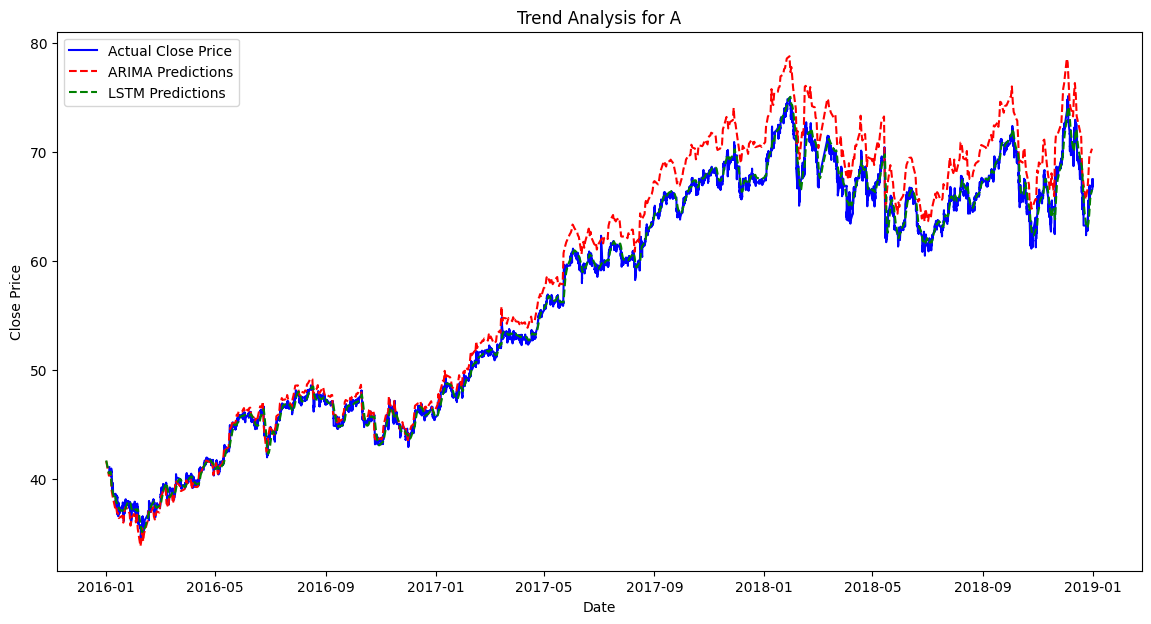

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


A - ARIMA RMSE: 2.348087939528368, LSTM RMSE: 0.7229685929382904


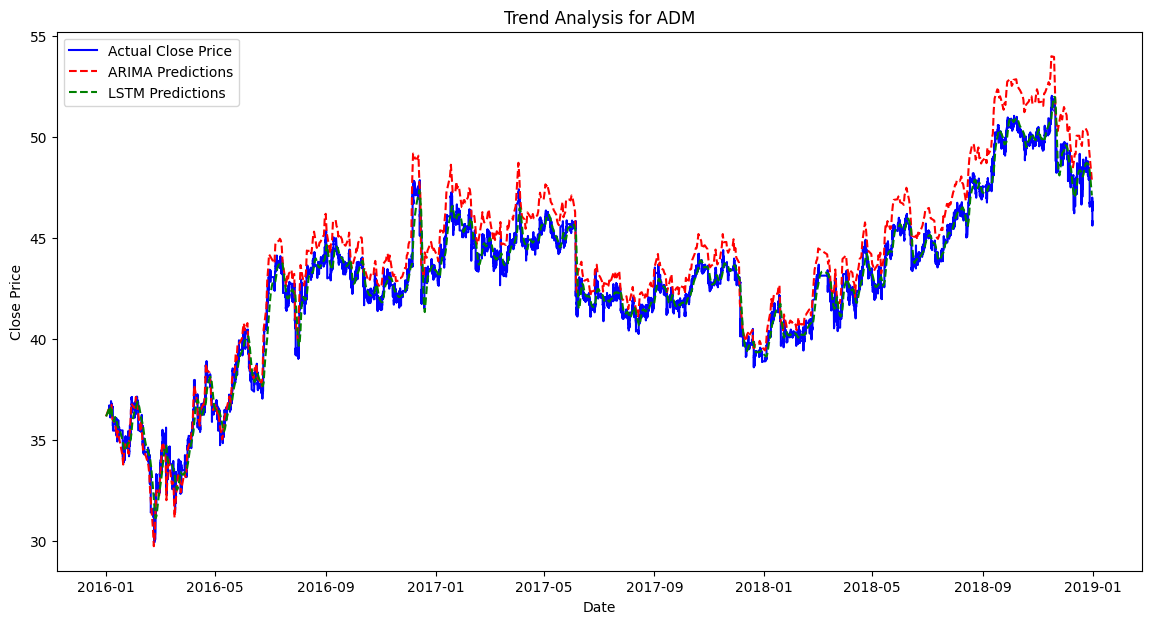

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ADM - ARIMA RMSE: 1.1378167016783272, LSTM RMSE: 0.5497802513190833


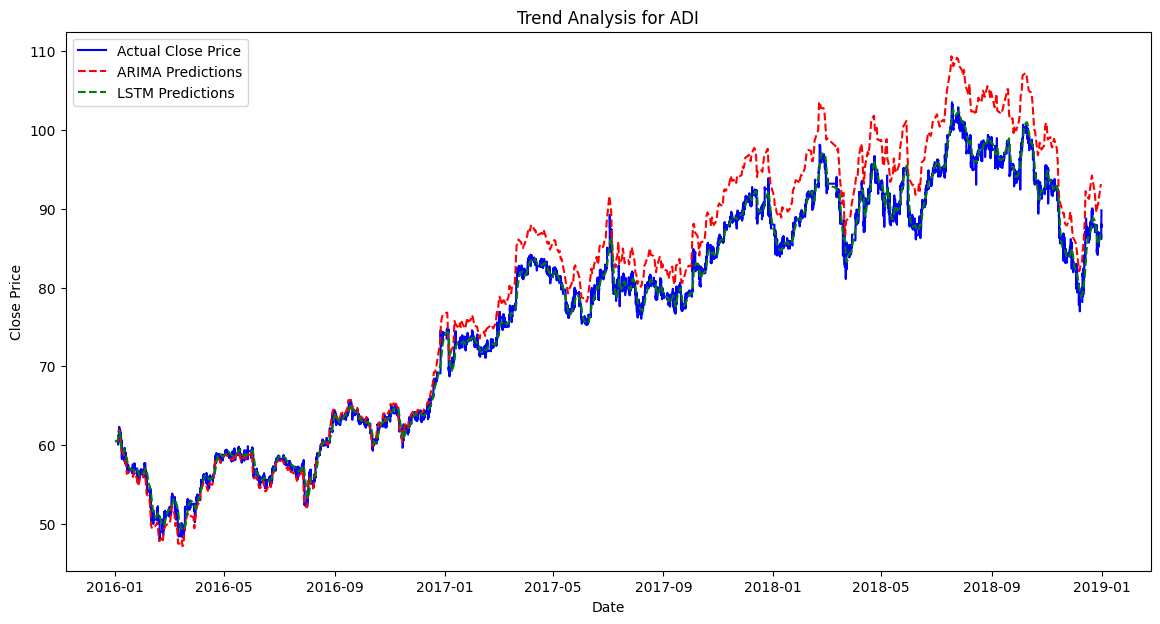

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ADI - ARIMA RMSE: 3.9021301847482284, LSTM RMSE: 0.9182951111631334


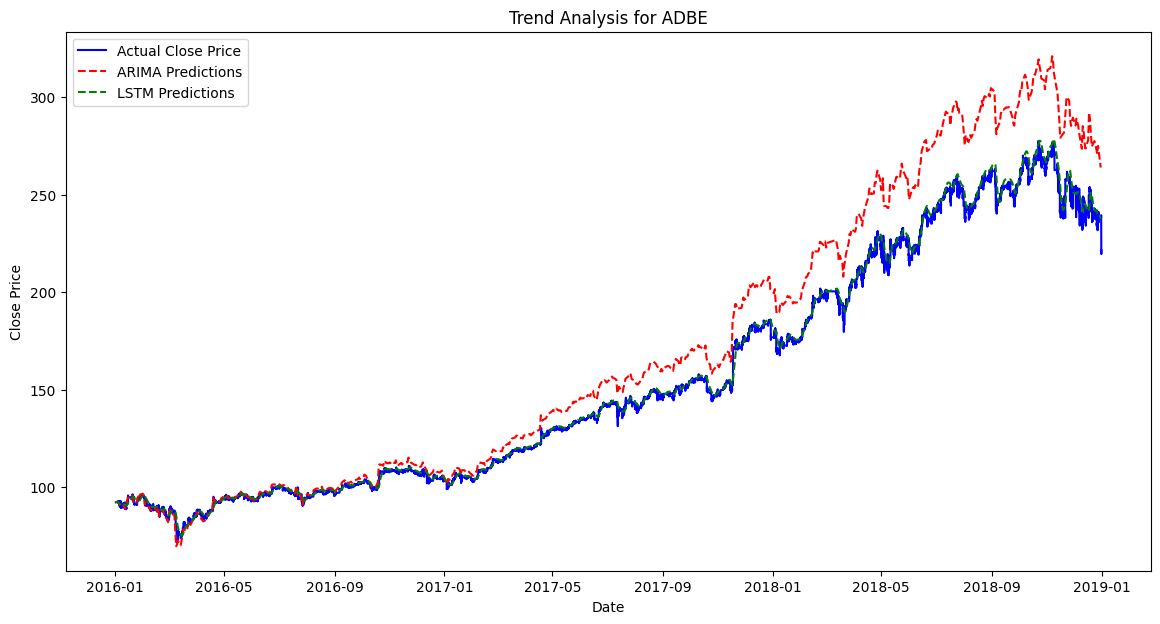

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ADBE - ARIMA RMSE: 21.343806915575183, LSTM RMSE: 2.8094030664122687


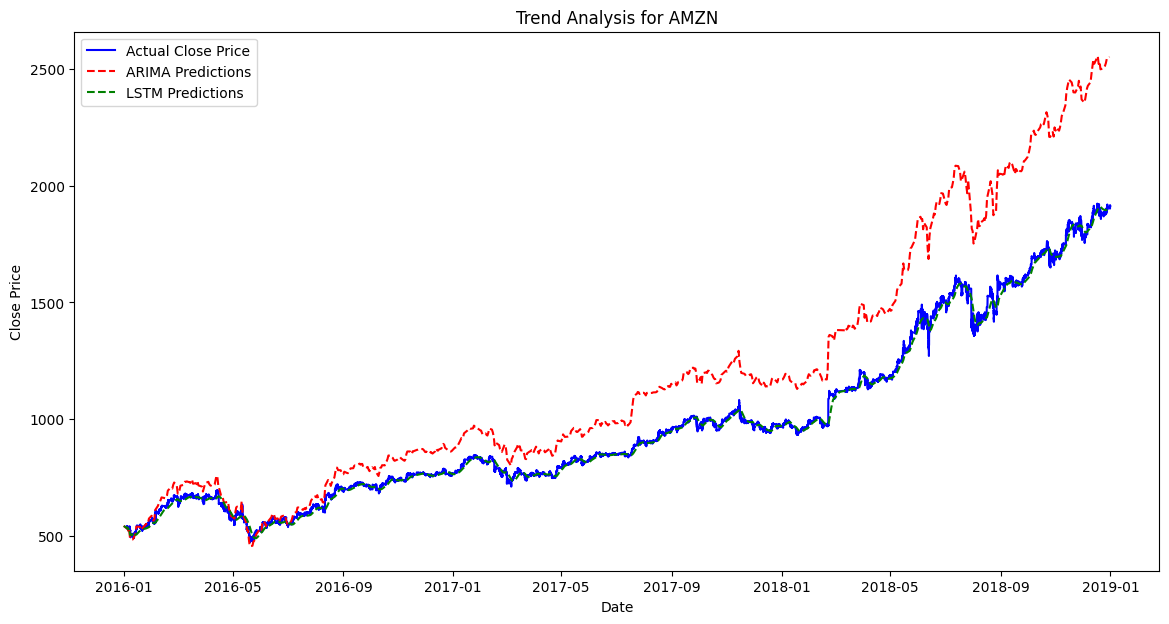

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AMZN - ARIMA RMSE: 264.34089749755594, LSTM RMSE: 20.9109565024507


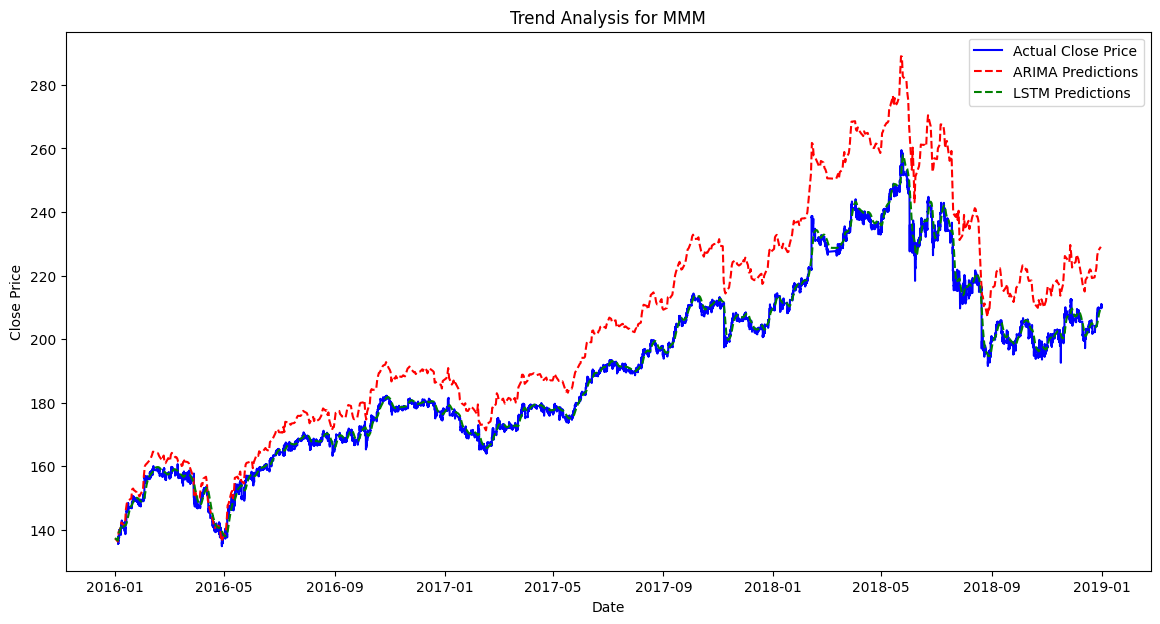

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MMM - ARIMA RMSE: 15.052555903409027, LSTM RMSE: 2.02745472270673


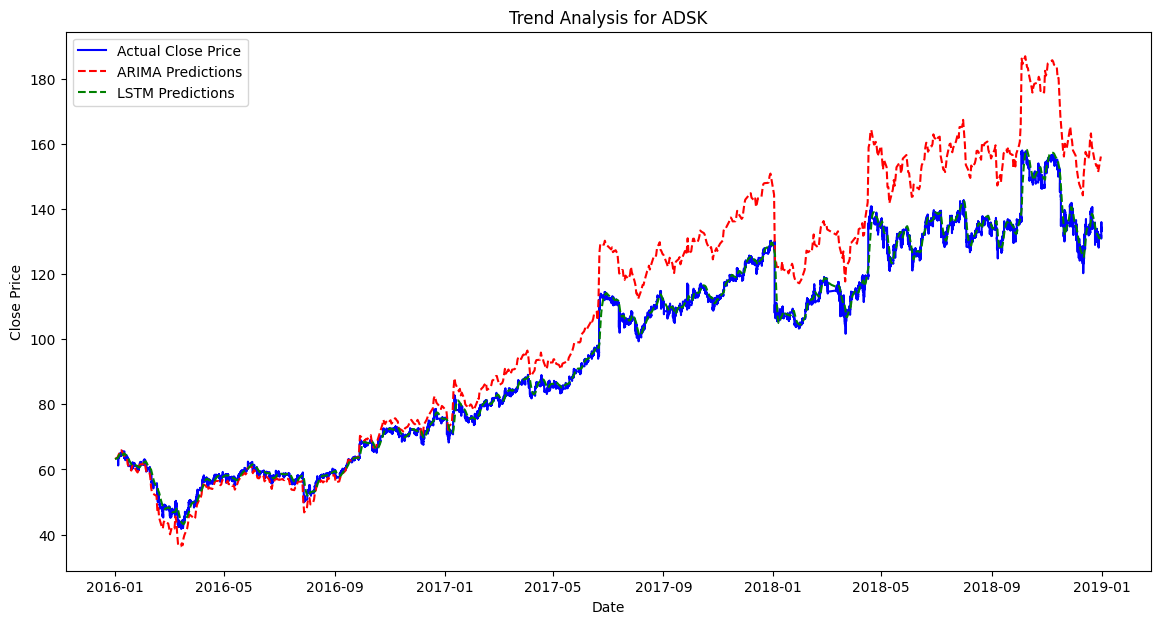

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ADSK - ARIMA RMSE: 14.61852079992274, LSTM RMSE: 1.9032402698283115


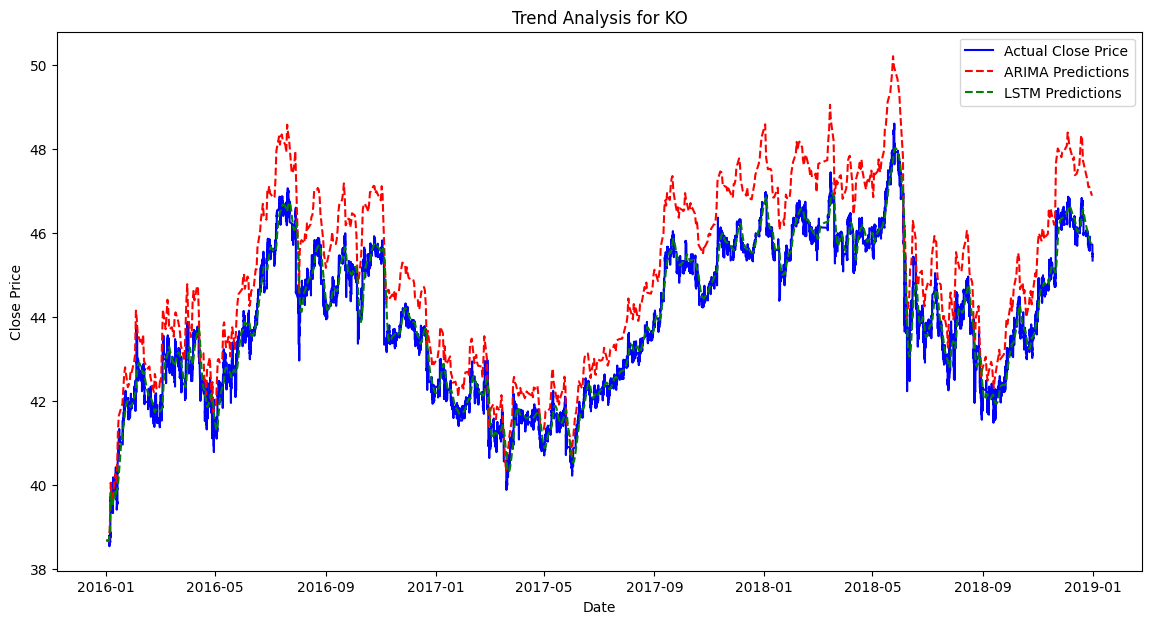

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KO - ARIMA RMSE: 1.132659874614345, LSTM RMSE: 0.31715064801610066


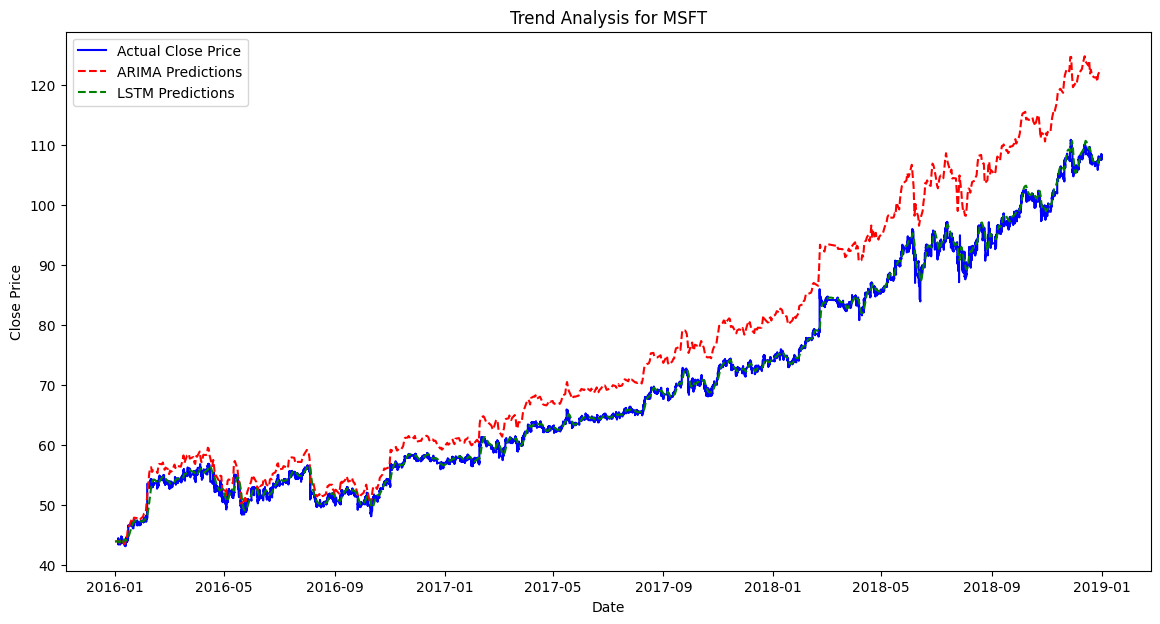

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSFT - ARIMA RMSE: 7.150523039923585, LSTM RMSE: 0.7634860608213755


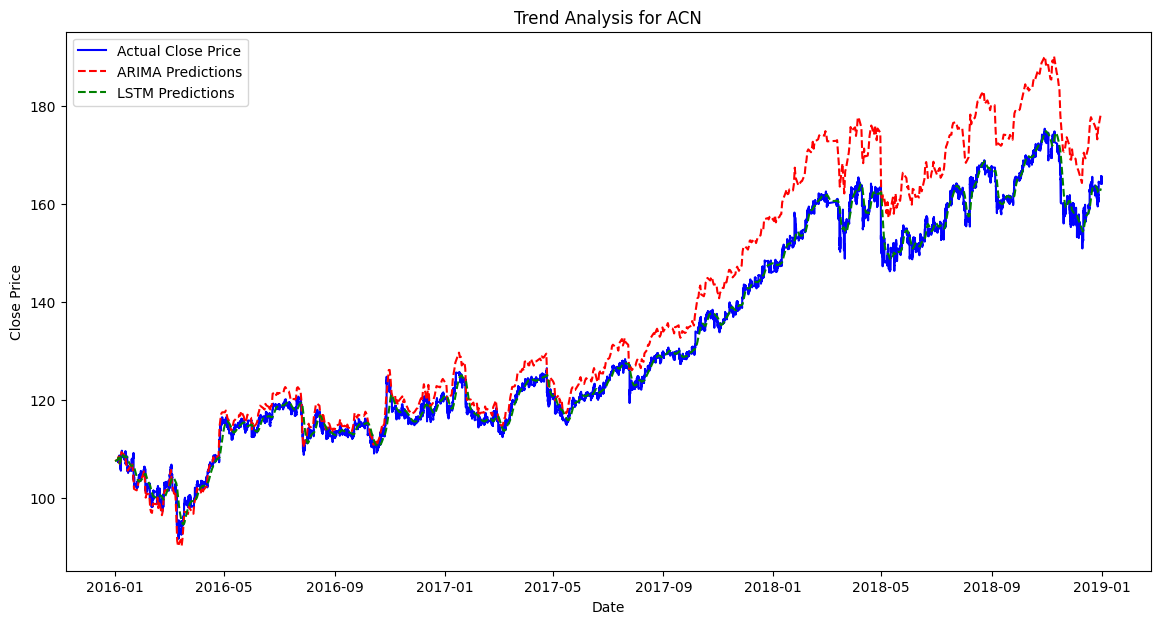

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ACN - ARIMA RMSE: 7.8496836959709, LSTM RMSE: 1.5813461108426394


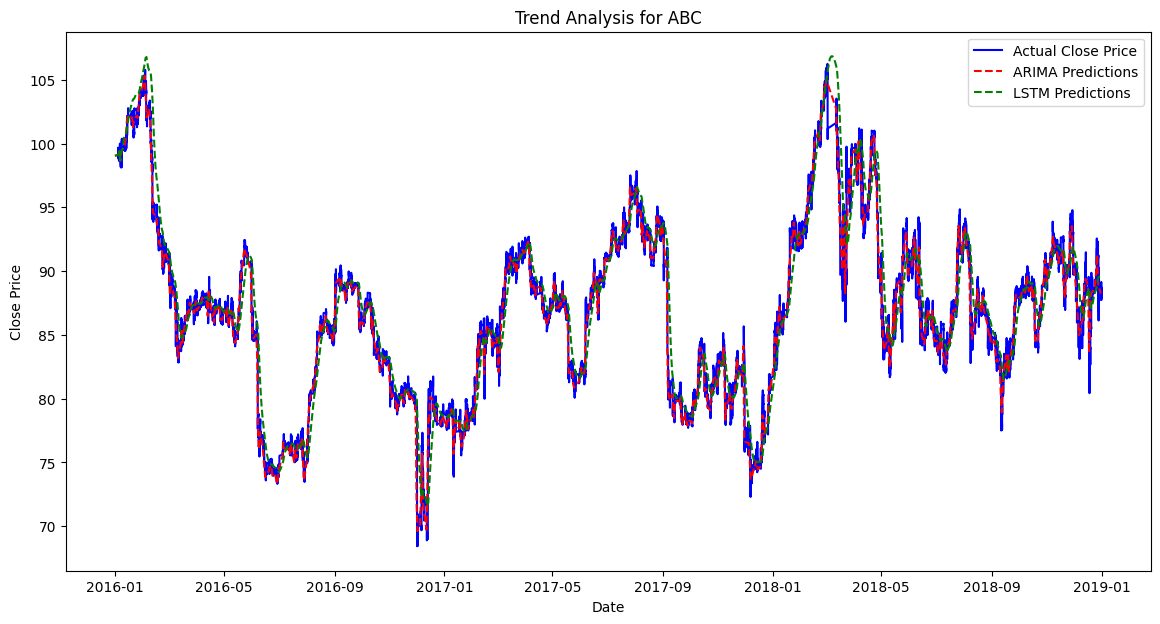

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ABC - ARIMA RMSE: 0.19473732628944018, LSTM RMSE: 1.9559967466330614


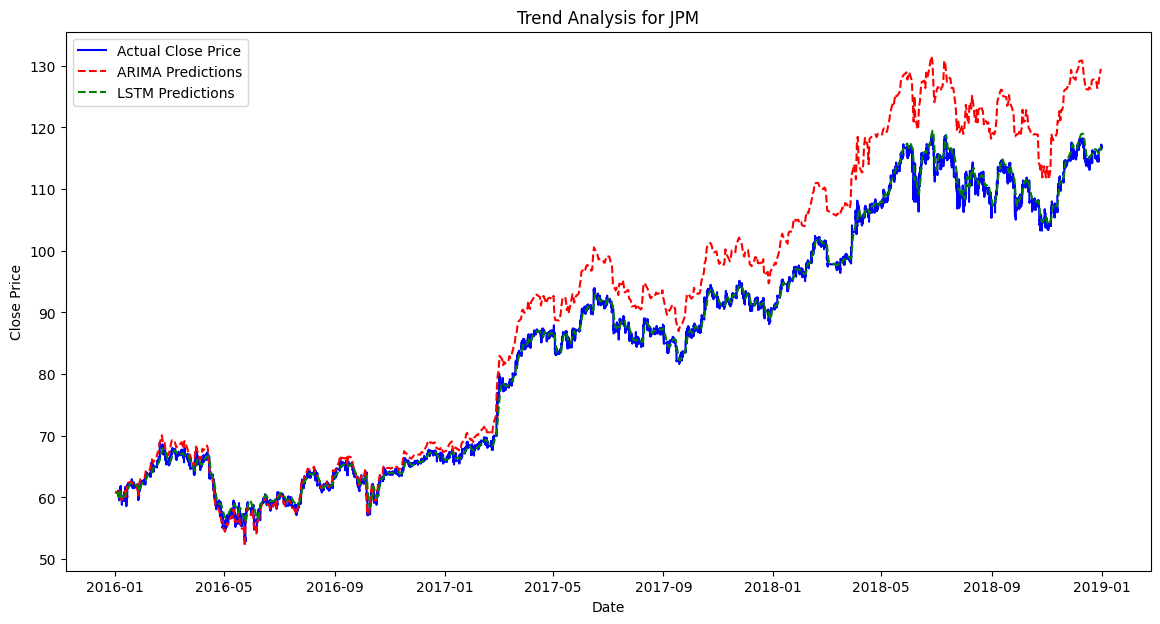

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


JPM - ARIMA RMSE: 7.029675446405402, LSTM RMSE: 0.909479126544441


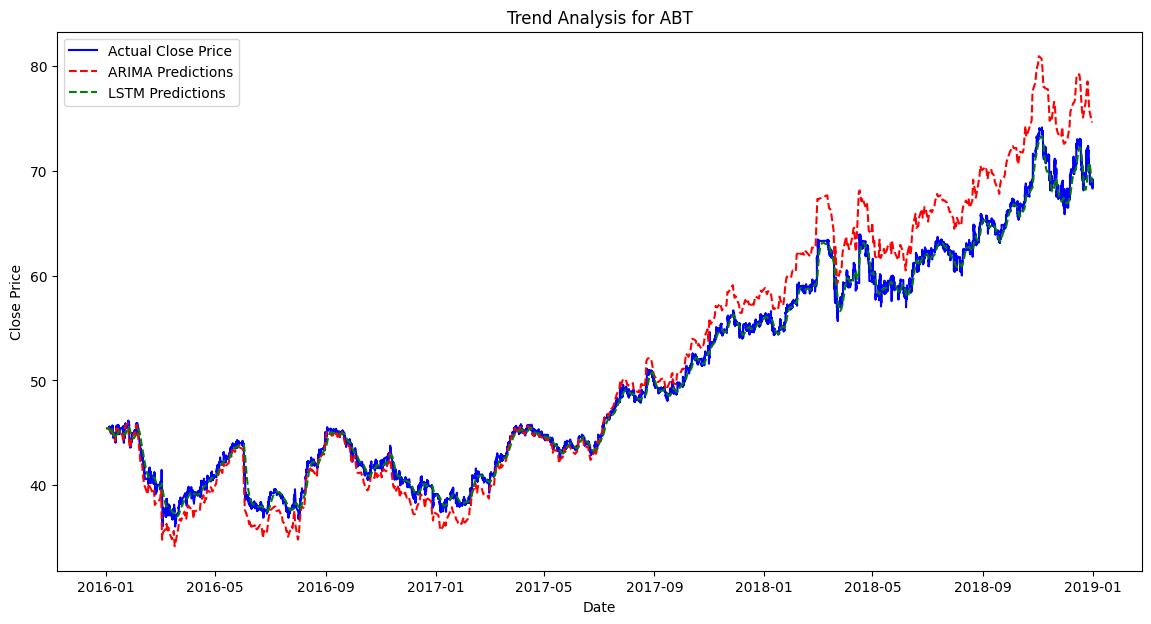

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ABT - ARIMA RMSE: 2.7794677713538847, LSTM RMSE: 0.6627014943487956


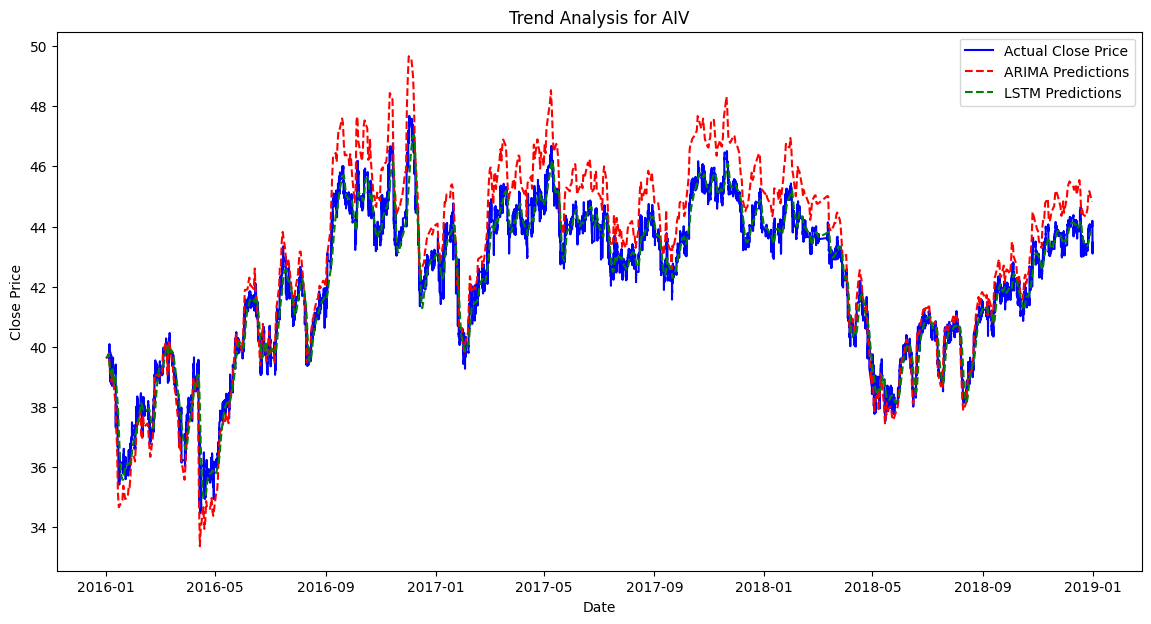

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AIV - ARIMA RMSE: 1.0469227154814331, LSTM RMSE: 0.47290146338135225


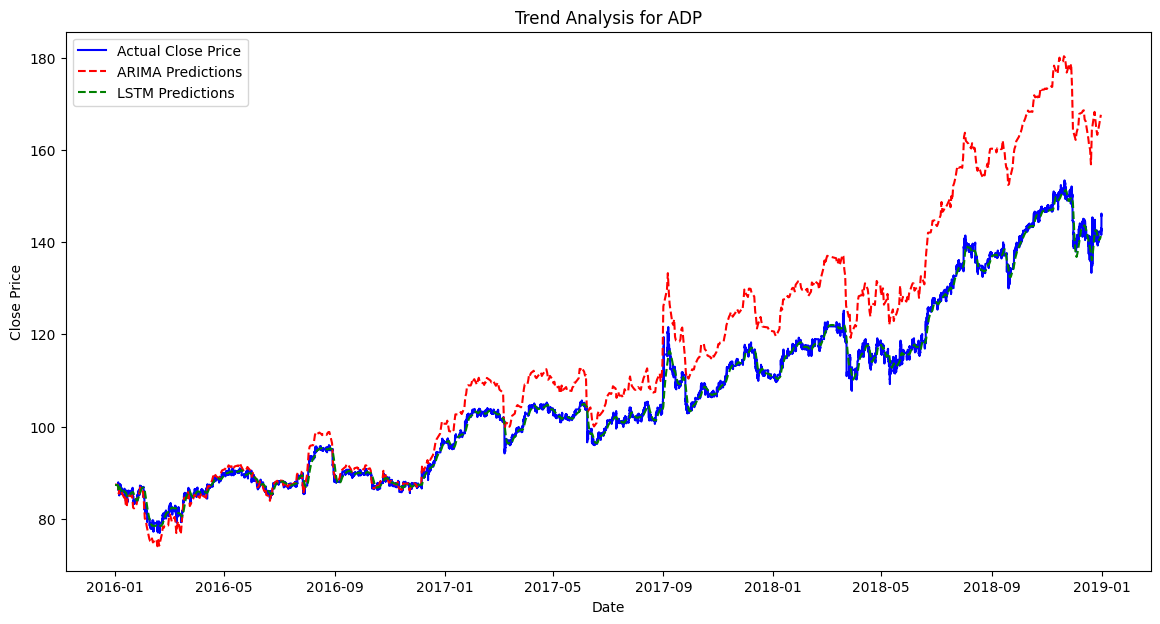

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ADP - ARIMA RMSE: 11.796624676455666, LSTM RMSE: 1.202354261023477


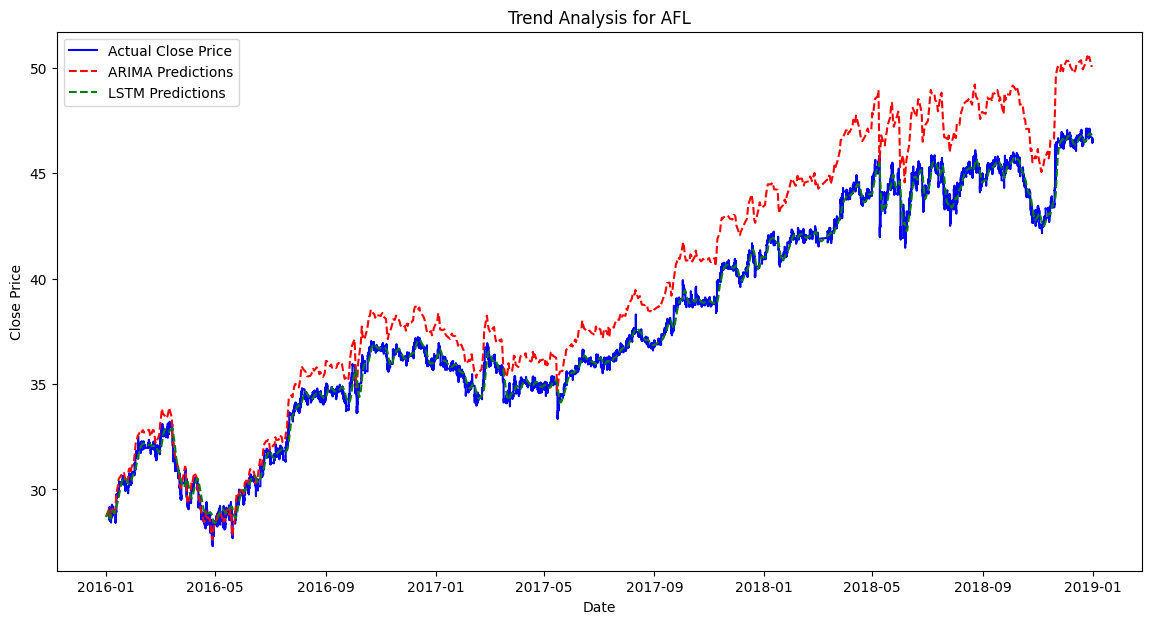

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AFL - ARIMA RMSE: 2.0727401099366594, LSTM RMSE: 0.3489029443394865


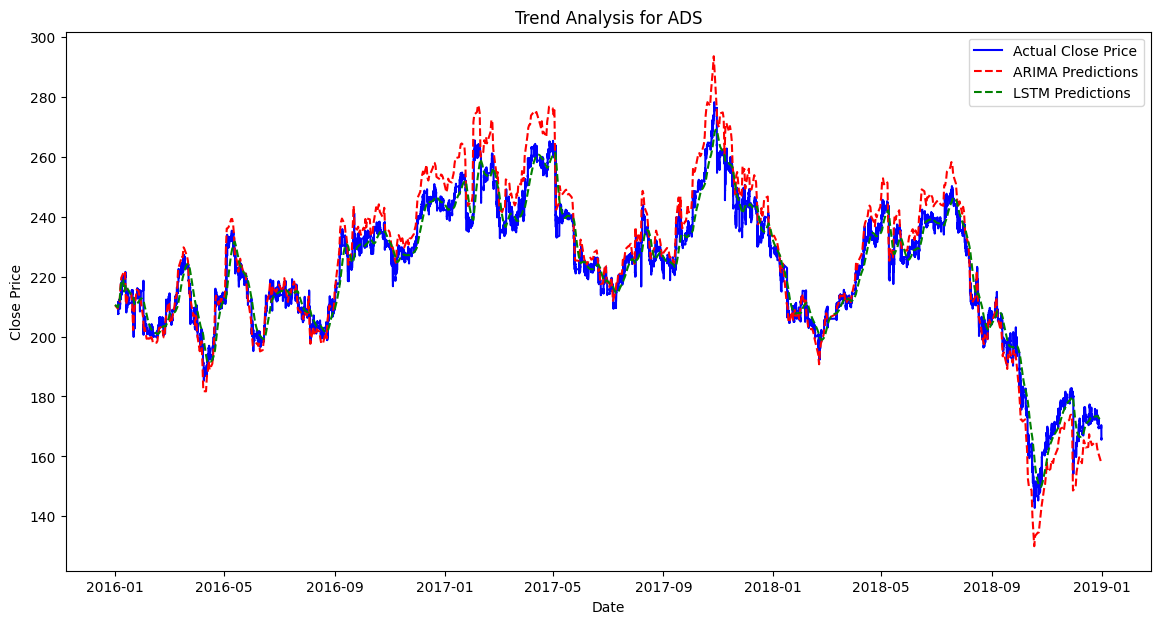

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ADS - ARIMA RMSE: 6.609166808963102, LSTM RMSE: 4.915831831328202


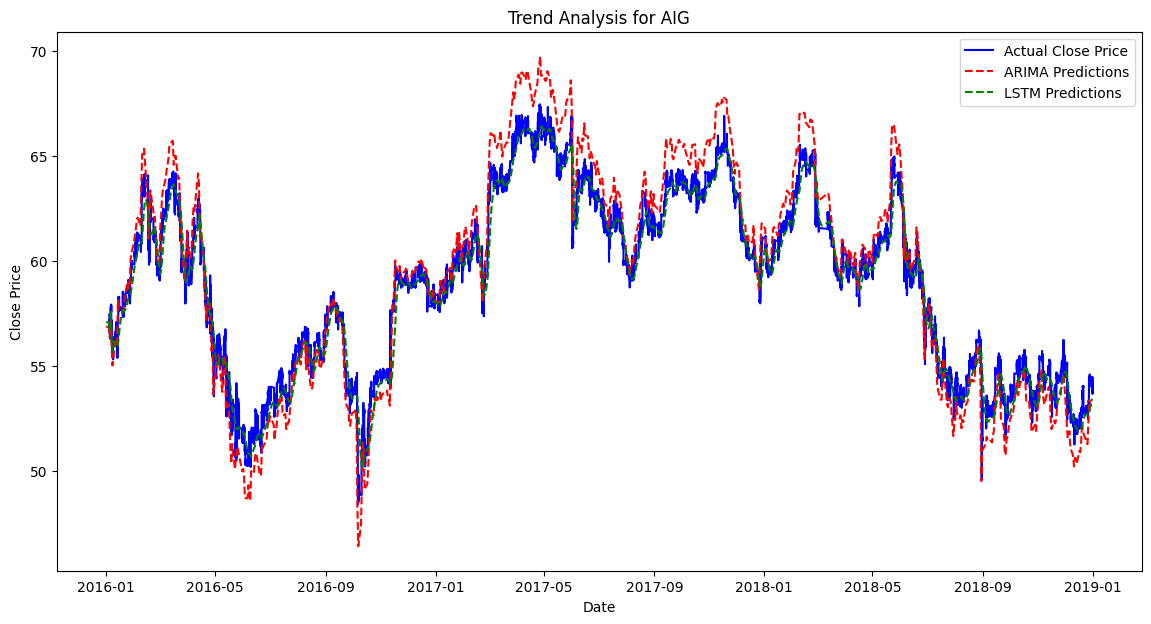

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AIG - ARIMA RMSE: 1.2387830686795387, LSTM RMSE: 0.7870237150248076


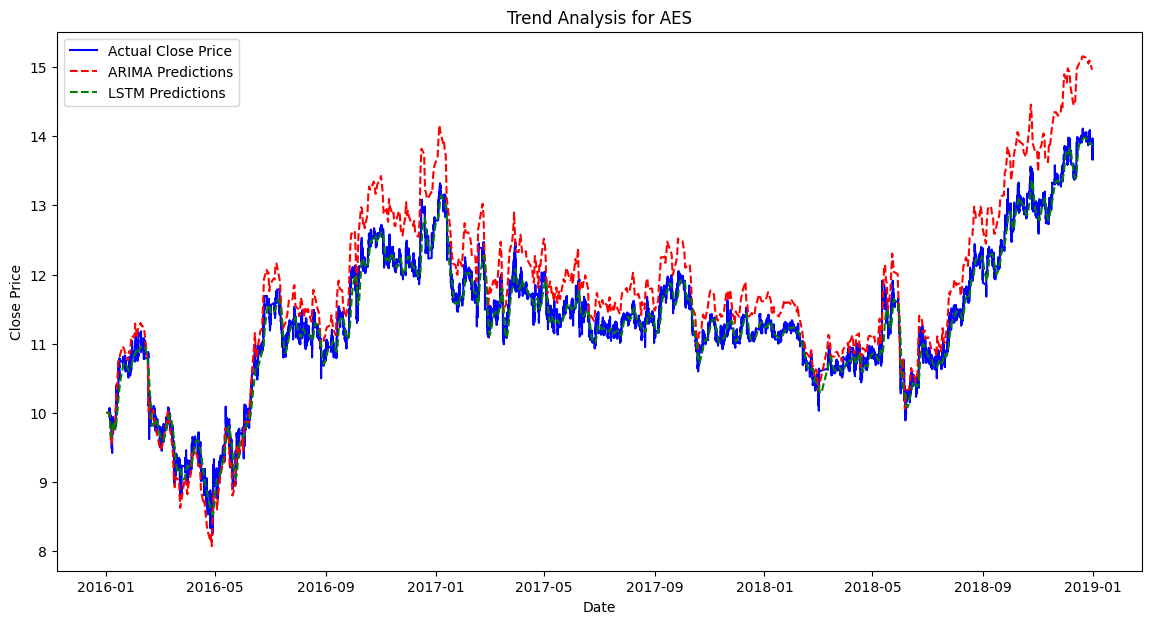

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AES - ARIMA RMSE: 0.48404440598011134, LSTM RMSE: 0.15246614700850356


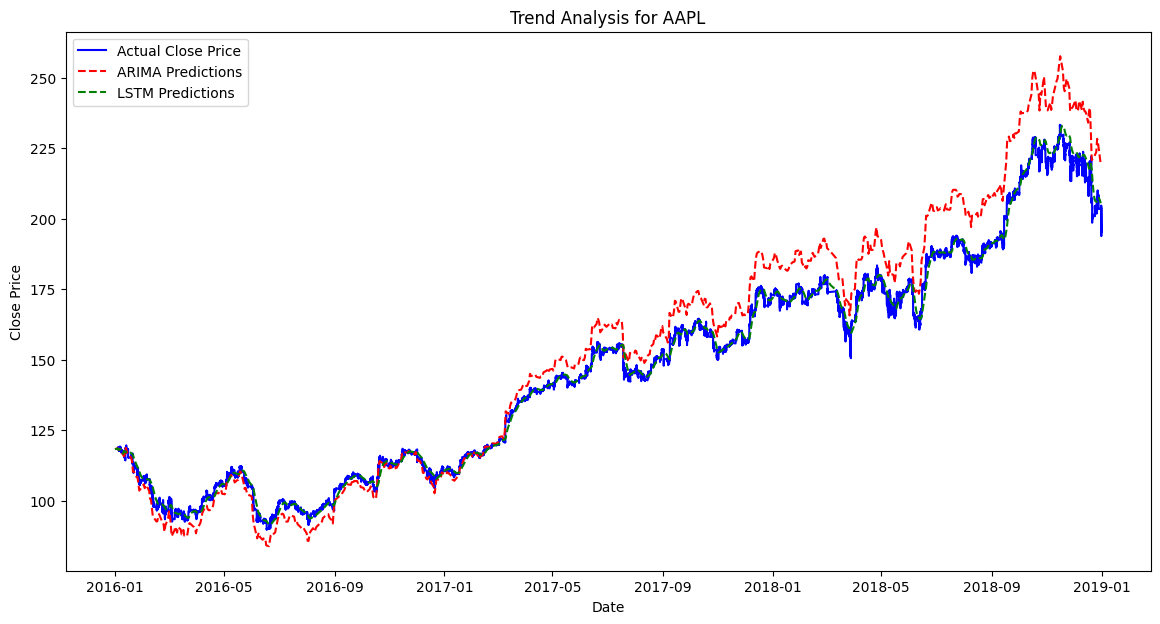

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AAPL - ARIMA RMSE: 10.668955598829845, LSTM RMSE: 2.4161221515988585


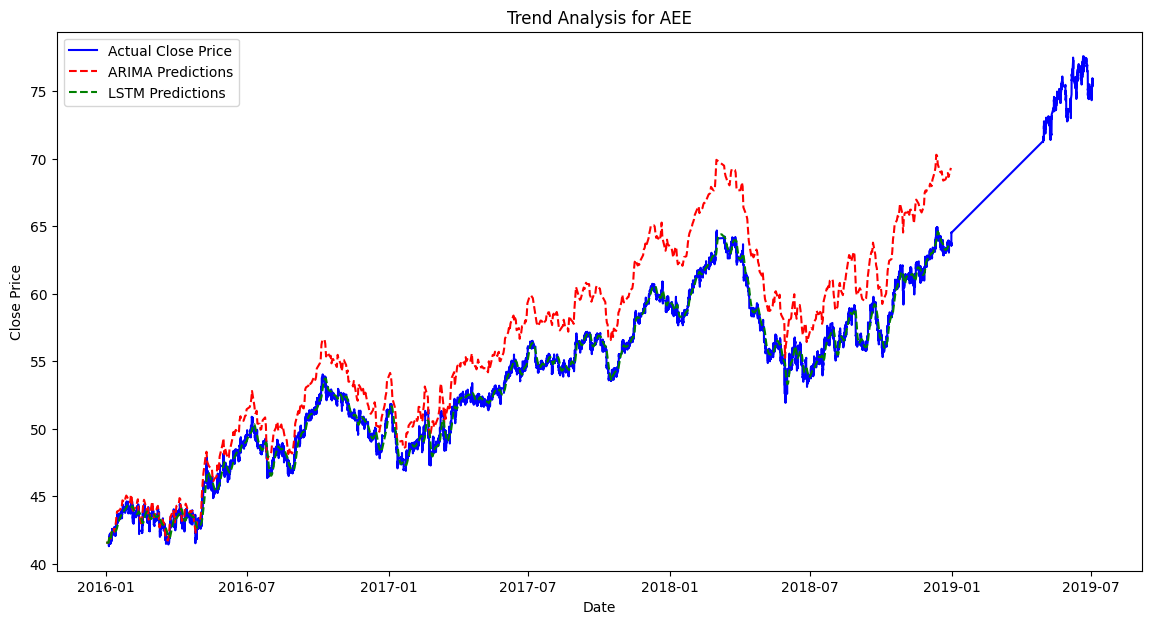

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AEE - ARIMA RMSE: 3.203238821111165, LSTM RMSE: 0.4835530104269105


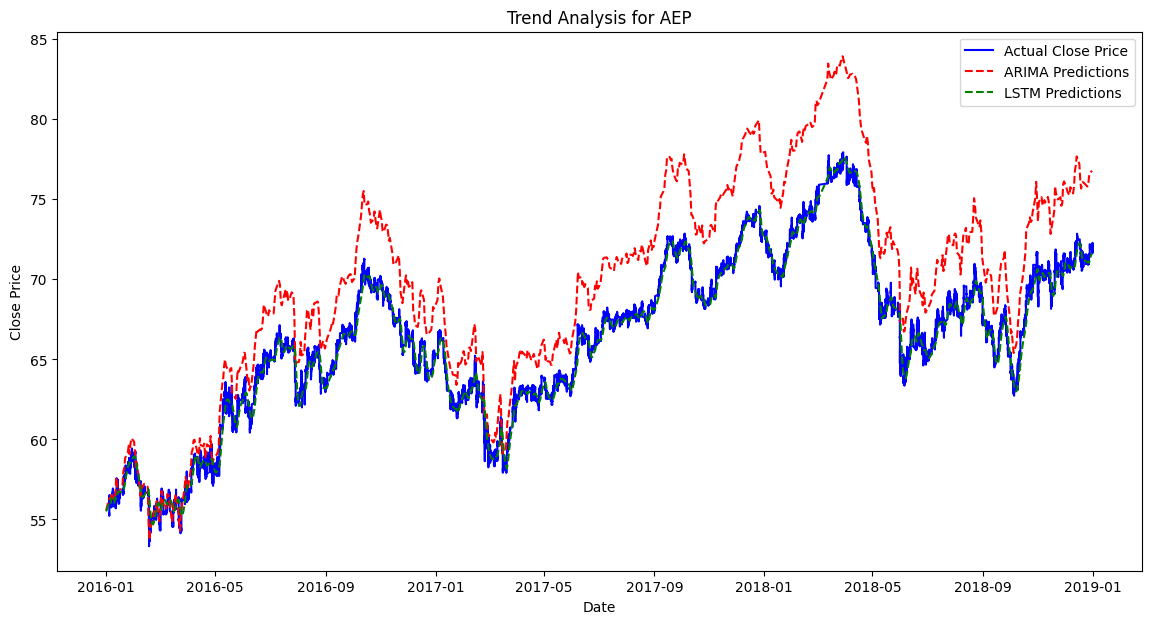

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AEP - ARIMA RMSE: 3.6139065154884147, LSTM RMSE: 0.5726345899372979


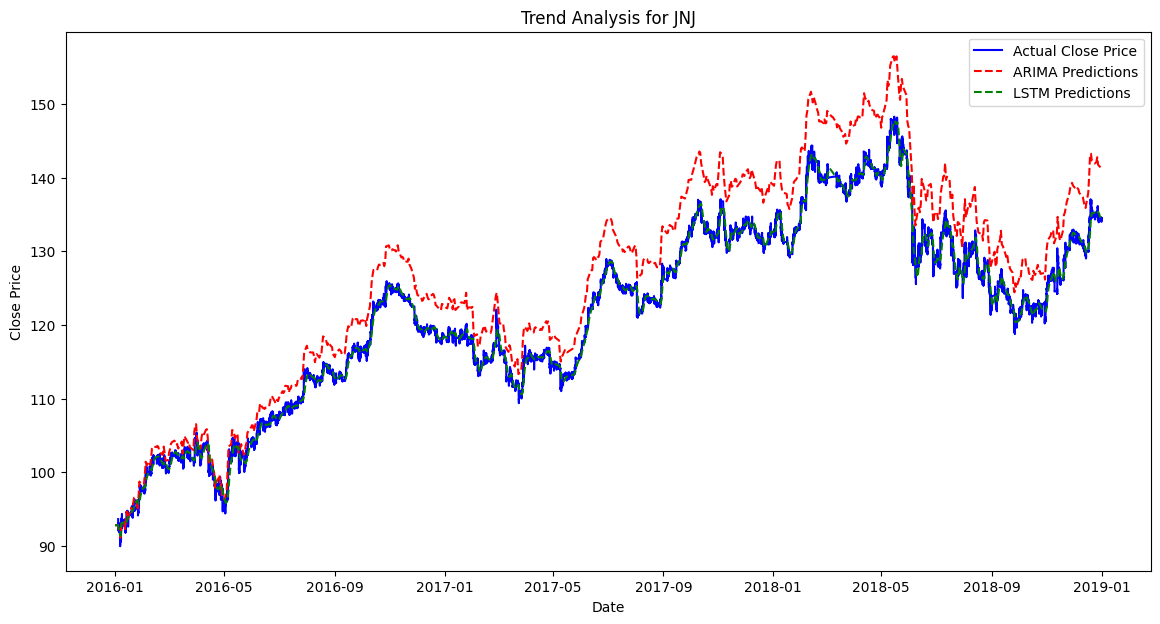

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


JNJ - ARIMA RMSE: 5.2823591421601295, LSTM RMSE: 0.8796546055216308


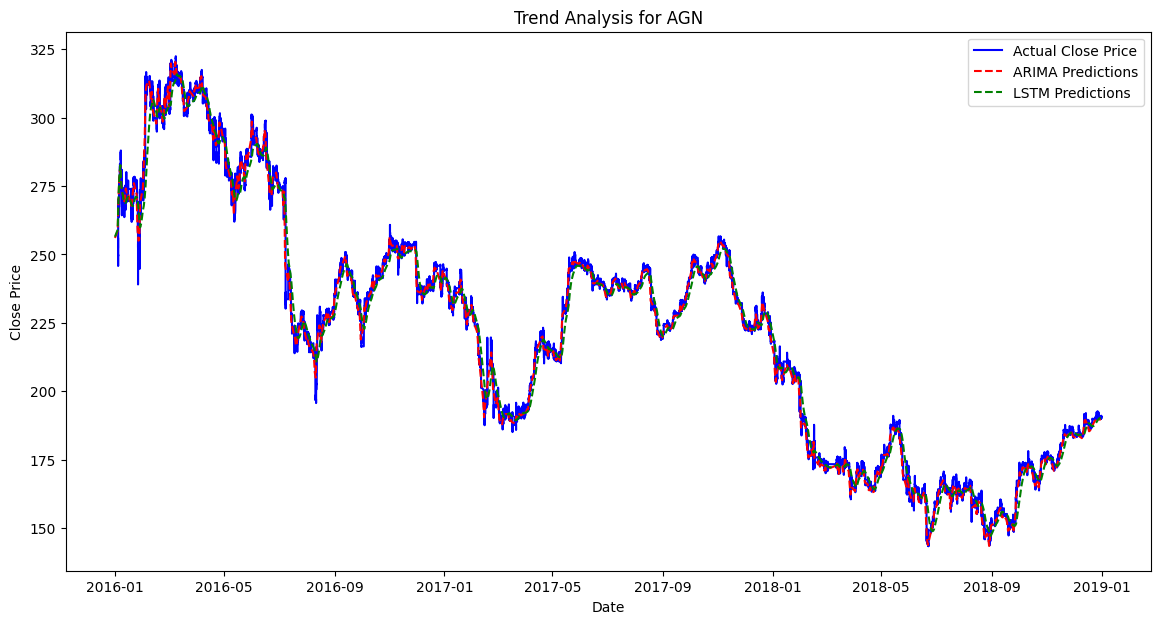

AGN - ARIMA RMSE: 0.8415190917907495, LSTM RMSE: 4.662417532570945


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [122]:
def main():
    dataset_dir = '../environment/datasets'
    model_dir = '../agents/trained_models'
    stocks = [f.split('.')[0] for f in os.listdir(dataset_dir) if f.endswith('.csv')]
    
    for stock in stocks:
        stock_data = load_stock_data(dataset_dir, stock)
        predictions = load_predictions(model_dir, stock)
        plot_stock_trends(stock_data, predictions, stock)
        rmse_arima, rmse_lstm = analyze_accuracy(predictions)
        print(f"{stock.upper()} - ARIMA RMSE: {rmse_arima}, LSTM RMSE: {rmse_lstm}")

if __name__ == "__main__":
    main()

As can be seen from the graphs generated, the graphs generally follow a couple of trends:

1) The LSTM predictions are generally very close to the actual results for each stock
2) The LSTM predictions generally outperform the ARIMA predictions
3) The graphs for the ARIMA predictions are very similar to the graphs for the actual results but seem shifted up.

# Code to analyze periods of high and low accuracy
The following code is used to analyze the root mean squared error (RMSE) over 30 day periods in order to analyse any periods of high and low accuracy

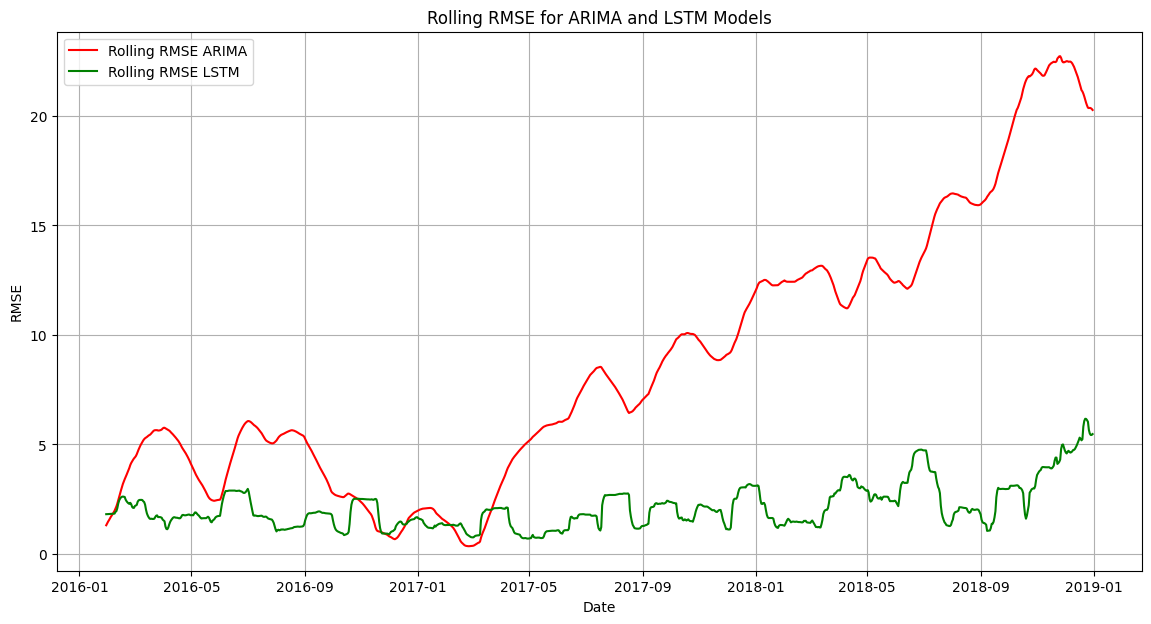

In [123]:
# Retrieves the predictions and actual values from a specified CSV file
def load_predictions(model_dir, stock_name):
    file_path = os.path.join(model_dir, stock_name, 'predictions.csv')
    predictions = pd.read_csv(file_path)
    predictions['date'] = pd.to_datetime(predictions['date'])
    return predictions.set_index('date')

# Computes the rolling RMSE for both ARIMA and LSTM models. The window parameter defines how many days are considered in each rolling calculation
def rolling_accuracy(predictions, window=30):  # window size can be adjusted
    # Calculate rolling RMSE for ARIMA and LSTM
    predictions['rmse_arima'] = predictions['actual'].rolling(window=window).apply(
        lambda x: np.sqrt(mean_squared_error(x, predictions.loc[x.index, 'arima'])),
        raw=False
    )
    predictions['rmse_lstm'] = predictions['actual'].rolling(window=window).apply(
        lambda x: np.sqrt(mean_squared_error(x, predictions.loc[x.index, 'lstm'])),
        raw=False
    )
    return predictions

#Visualizes the rolling RMSE over time for each model, helping to identify periods of high and low accuracy visually
def plot_rolling_accuracy(predictions):
    plt.figure(figsize=(14, 7))
    plt.plot(predictions['rmse_arima'], label='Rolling RMSE ARIMA', color='red')
    plt.plot(predictions['rmse_lstm'], label='Rolling RMSE LSTM', color='green')
    plt.title('Rolling RMSE for ARIMA and LSTM Models')
    plt.xlabel('Date')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load predictions for a specific stock
#TODO : Do for all stocks
model_dir = '../agents/trained_models'
stock_name = 'aapl'  # Example stock
predictions = load_predictions(model_dir, stock_name)

# Calculate rolling accuracy
predictions = rolling_accuracy(predictions, window=30)  # Window size of 30 days

# Plot rolling accuracy
plot_rolling_accuracy(predictions)

As can be seen from the graph, the RMSE of the ARIMA model tends to grow overtime, whereas the RMSE of the LTSM model tends to relatively constant. This could be due to the sensitivity of the ARIMA model to trends in data.

# Analysing Trends
Similarly to the last section, instead of RMSE, this code looks at the rolling accuracy over 30 day periods.

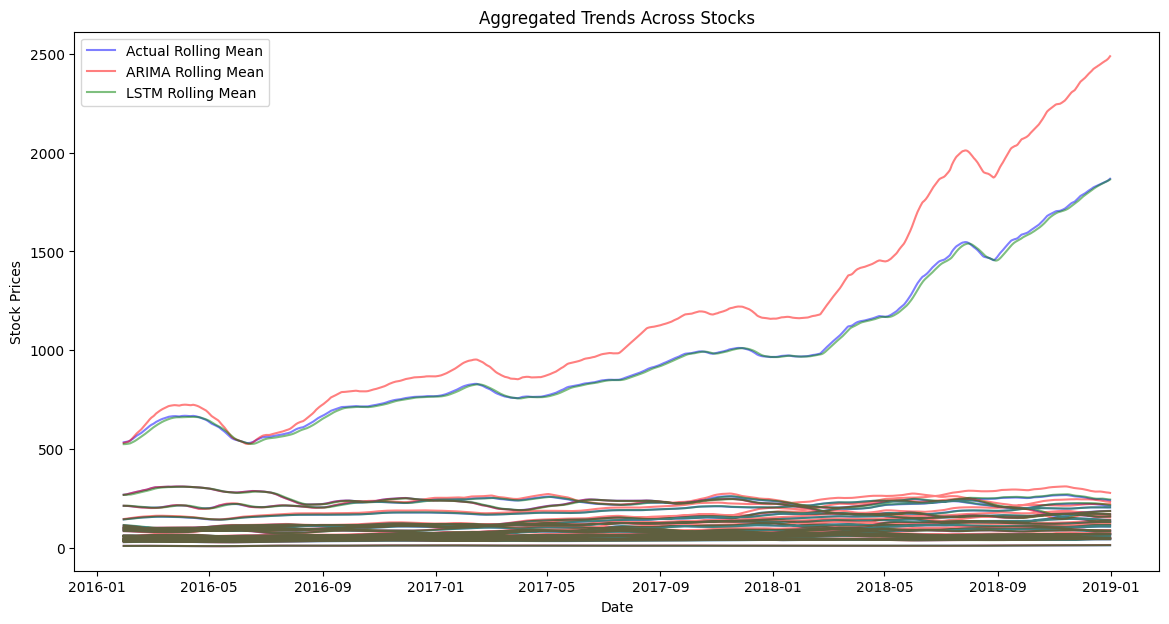

In [124]:
def load_predictions(model_dir, stock_name):
    file_path = os.path.join(model_dir, stock_name, 'predictions.csv')
    predictions = pd.read_csv(file_path)
    predictions['date'] = pd.to_datetime(predictions['date'])
    return predictions.set_index('date')

def calculate_rolling_accuracy(predictions, window=30):  # Adjust window size as needed
    rmse_arima = np.sqrt(mean_squared_error(predictions['actual'], predictions['arima']))
    rmse_lstm = np.sqrt(mean_squared_error(predictions['actual'], predictions['lstm']))
    return rmse_arima, rmse_lstm

def aggregate_trends(stocks, model_dir):
    trend_data = pd.DataFrame()
    for stock in stocks:
        predictions = load_predictions(model_dir, stock)
        predictions['rolling_mean_actual'] = predictions['actual'].rolling(window=30).mean()
        predictions['rolling_mean_arima'] = predictions['arima'].rolling(window=30).mean()
        predictions['rolling_mean_lstm'] = predictions['lstm'].rolling(window=30).mean()
        trend_data = pd.concat([trend_data, predictions[['rolling_mean_actual', 'rolling_mean_arima', 'rolling_mean_lstm']]], axis=0)
    return trend_data

def plot_aggregated_trends(trend_data):
    plt.figure(figsize=(14, 7))
    plt.plot(trend_data['rolling_mean_actual'], label='Actual Rolling Mean', color='blue', alpha=0.5)
    plt.plot(trend_data['rolling_mean_arima'], label='ARIMA Rolling Mean', color='red', alpha=0.5)
    plt.plot(trend_data['rolling_mean_lstm'], label='LSTM Rolling Mean', color='green', alpha=0.5)
    plt.title('Aggregated Trends Across Stocks')
    plt.xlabel('Date')
    plt.ylabel('Stock Prices')
    plt.legend()
    plt.show()

# Directory settings
model_dir = '../agents/trained_models'
dataset_dir = '../environment/datasets'
stocks = [f.split('.')[0] for f in os.listdir(dataset_dir) if f.endswith('.csv')]

# Aggregating trends
trend_data = aggregate_trends(stocks, model_dir)

# Plotting aggregated trends
plot_aggregated_trends(trend_data)

# Profitability
Now shifting focus to profitability, the following sections take a look at the profitability of our models based on their predictions, and the actions they take.

This first code section calculates the mean arbitrage gain across stocks, in other words, by what factor were the models able to gain profit

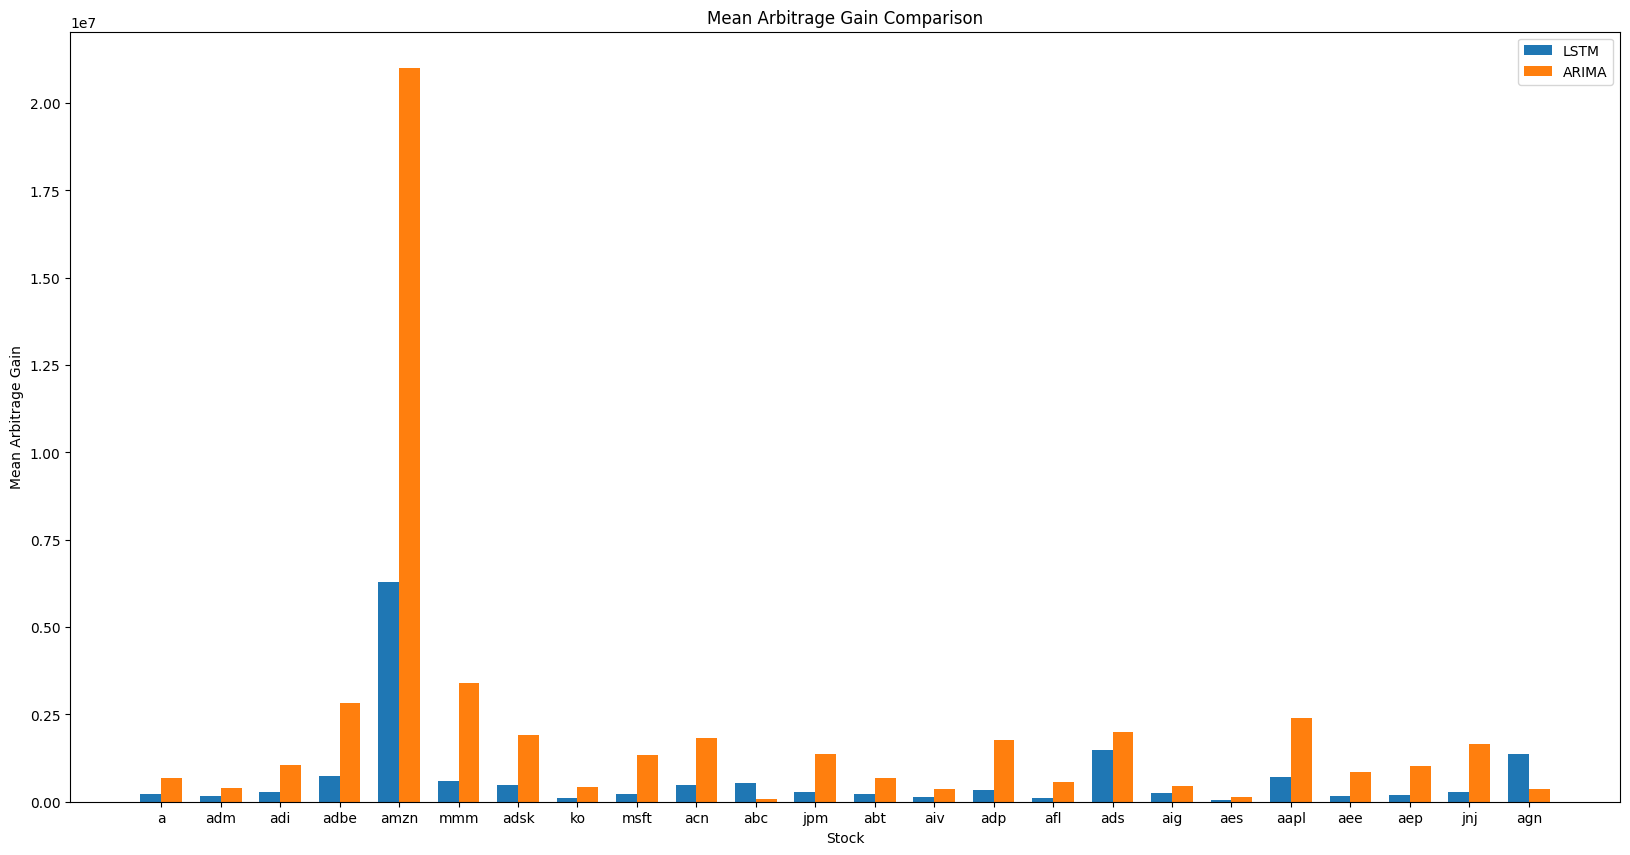

In [157]:
dataset_dir = '../environment/datasets'
stocks = [f.split('.')[0] for f in os.listdir(dataset_dir) if f.endswith('.csv')]

data = []

for stock in stocks:

    data_dir = '../agents/trained_models/' + stock + '/profit_stats.json'
    curr_data = pd.read_json(data_dir)
    mean_arbitrage_gain_lstm = curr_data['lstm']['mean_arbitrage_gain']
    mean_arbitrage_gain_arima = curr_data['arima']['mean_arbitrage_gain']

    data.append((mean_arbitrage_gain_lstm, mean_arbitrage_gain_arima , stock))

# Extracting data from the tuple
mean_arbitrage_gain_lstm = [item[0] for item in data]
mean_arbitrage_gain_arima = [item[1] for item in data]
stocks = [item[2] for item in data]

# Number of stocks
num_stocks = len(stocks)

# Width of each bar
bar_width = 0.35

# Index for the x-axis
indices = np.arange(num_stocks)
plt.figure(figsize=(20, 10))

# Creating the grouped bar plot
plt.bar(indices, mean_arbitrage_gain_lstm, bar_width, label='LSTM')
plt.bar(indices + bar_width, mean_arbitrage_gain_arima, bar_width, label='ARIMA')

# Adding labels and title
plt.xlabel('Stock')
plt.ylabel('Mean Arbitrage Gain')
plt.title('Mean Arbitrage Gain Comparison')
plt.xticks(indices + bar_width / 2, stocks)
plt.legend()

# Showing the plot
plt.show()

This second code section calculates the max arbitrage gain across stocks, in other words, what was the maximum they gained at any point in the time period for a given stock.

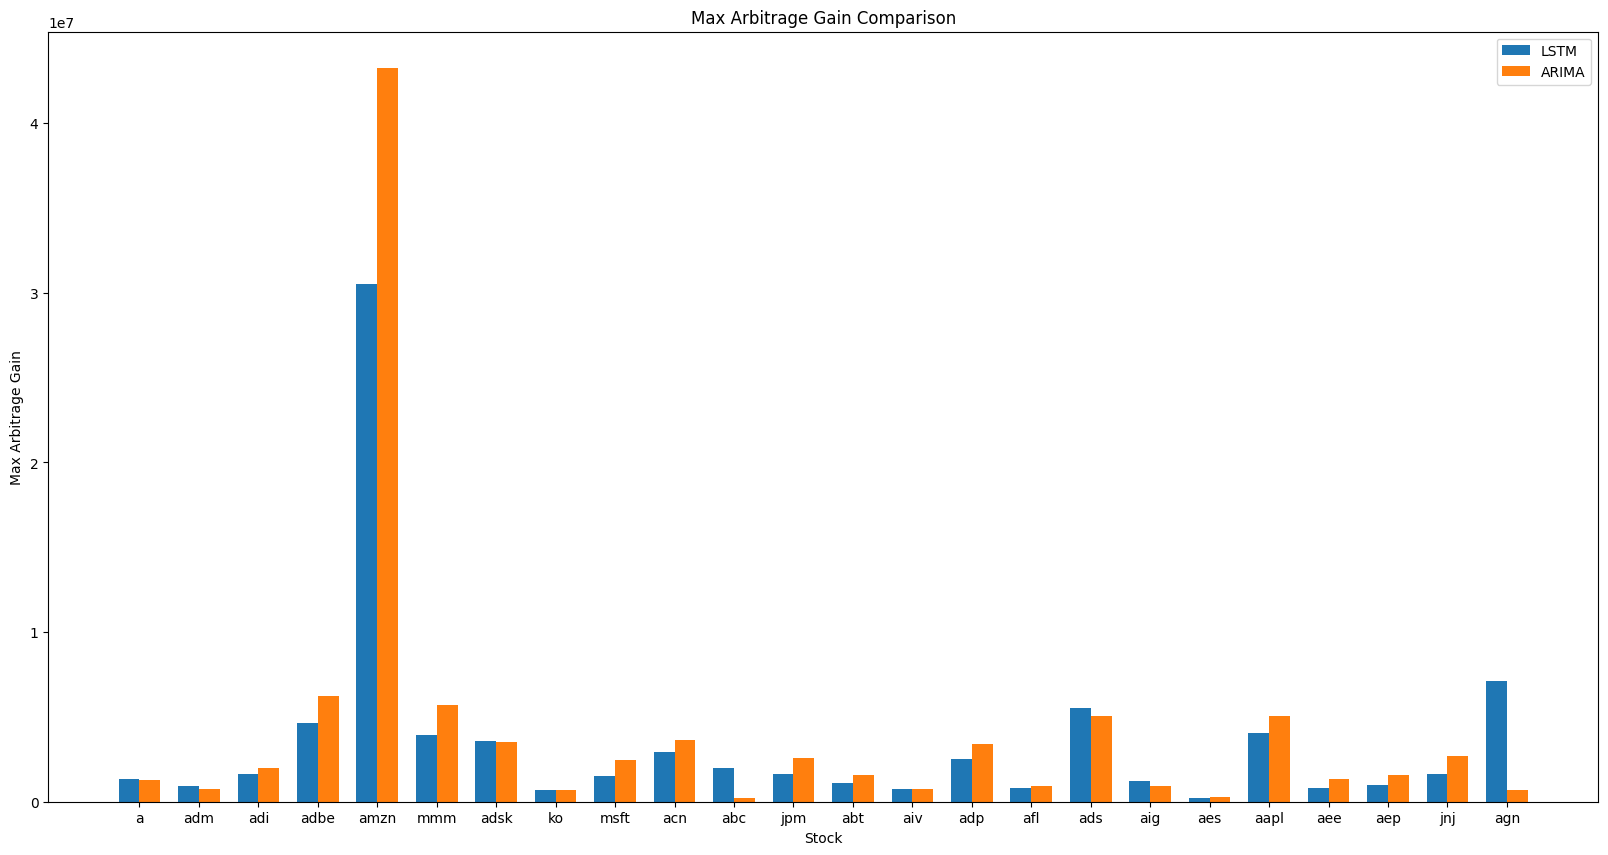

In [158]:
dataset_dir = '../environment/datasets'
stocks = [f.split('.')[0] for f in os.listdir(dataset_dir) if f.endswith('.csv')]

data = []

for stock in stocks:

    data_dir = '../agents/trained_models/' + stock + '/profit_stats.json'
    curr_data = pd.read_json(data_dir)
    mean_arbitrage_gain_lstm = curr_data['lstm']['max_arbitrage_gain']
    mean_arbitrage_gain_arima = curr_data['arima']['max_arbitrage_gain']

    data.append((mean_arbitrage_gain_lstm, mean_arbitrage_gain_arima , stock))

# Extracting data from the tuple
mean_arbitrage_gain_lstm = [item[0] for item in data]
mean_arbitrage_gain_arima = [item[1] for item in data]
stocks = [item[2] for item in data]

# Number of stocks
num_stocks = len(stocks)

# Width of each bar
bar_width = 0.35

# Index for the x-axis
indices = np.arange(num_stocks)
plt.figure(figsize=(20, 10))

# Creating the grouped bar plot
plt.bar(indices, mean_arbitrage_gain_lstm, bar_width, label='LSTM')
plt.bar(indices + bar_width, mean_arbitrage_gain_arima, bar_width, label='ARIMA')

# Adding labels and title
plt.xlabel('Stock')
plt.ylabel('Max Arbitrage Gain')
plt.title('Max Arbitrage Gain Comparison')
plt.xticks(indices + bar_width / 2, stocks)
plt.legend()

# Showing the plot
plt.show()